The **double slit experiment** is one of the most fundamental demonstrations of the difference between classical and quantum behavior. In *1803*, **Thomas Young** on his famous paper, "**Experiments and calculations relative to physical optics**", first proposed the famous double slit experiment.

In the classical world, things are either here or there. A ball goes through one hole or the other – simple. But in the quantum world, particles act like waves and can interfere with themselves. It can behave as if it goes through both slits simultaneously. This results in an interference pattern, even when particles are sent one at a time.

In this notebook, we’ll simulate the double slit experiment using **Qiskit**. While we won’t use physical slits or particles, we’ll model the quantum behavior using qubits and quantum gates. This gives us a way to explore how interference and superposition can emerge in a quantum system.

In [ ]:
%pip install qiskit
%pip install qiskit-aer

In [ ]:
%pip install pylatexenc

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

import pylatexenc

In [16]:
particle = QuantumRegister(1, name='particle')
screen = ClassicalRegister(1, name='screen')

In [17]:
theta = Parameter('θ')

In [22]:
double_slit = QuantumCircuit(particle, screen)
double_slit.h(particle)
double_slit.barrier()
double_slit.p(theta, particle)
double_slit.barrier()
double_slit.h(particle)

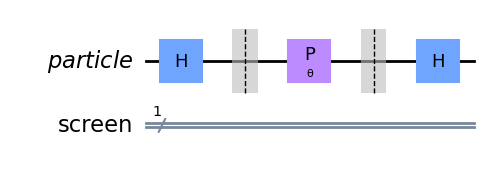

In [23]:
double_slit.draw('mpl', style = 'clifford')

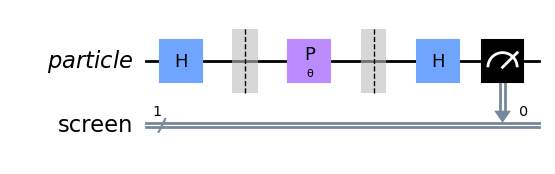

In [24]:
double_slit.measure(particle, screen)
double_slit.draw('mpl', style = 'clifford')

In [33]:
backend = AerSimulator()
sampler = Sampler(mode=backend)

In [48]:
theta_list = np.linspace(-4*np.pi, 4*np.pi, 1000)
pm = generate_preset_pass_manager(backend = AerSimulator(), optimization_level=3)
qc_isa = pm.run(double_slit)
dist = sampler.run([(qc_isa, theta_list)], shots = 10000).result()[0].data.screen

probability = []

for i in range(len(theta_list)):
  result = dist[i].get_counts()
  if '0' in result:
    p = result['0']/10000
    probability.append(p)
  else:
    probability.append(0)

print(probability)

[1.0, 0.9995, 0.9994, 0.9985, 0.9973, 0.9962, 0.9948, 0.9922, 0.991, 0.9858, 0.9849, 0.9811, 0.9776, 0.9707, 0.9715, 0.9652, 0.9602, 0.9547, 0.9505, 0.9434, 0.939, 0.9287, 0.9228, 0.9167, 0.9105, 0.8986, 0.8997, 0.8878, 0.8844, 0.8721, 0.863, 0.8577, 0.8459, 0.8316, 0.8315, 0.8208, 0.8116, 0.8006, 0.7862, 0.7755, 0.7654, 0.7593, 0.7421, 0.7288, 0.7233, 0.7152, 0.7029, 0.6965, 0.6754, 0.6657, 0.6507, 0.6412, 0.6317, 0.6135, 0.606, 0.5954, 0.5773, 0.5672, 0.5648, 0.5536, 0.5362, 0.5112, 0.4961, 0.4907, 0.4754, 0.4551, 0.4487, 0.4488, 0.4375, 0.4237, 0.4032, 0.3933, 0.3808, 0.3739, 0.3455, 0.3431, 0.3327, 0.324, 0.3171, 0.3056, 0.2865, 0.2717, 0.2672, 0.2558, 0.2366, 0.2293, 0.223, 0.2072, 0.2029, 0.1902, 0.1784, 0.1708, 0.1606, 0.1483, 0.1444, 0.1374, 0.1286, 0.1204, 0.113, 0.1061, 0.0956, 0.0883, 0.0785, 0.0771, 0.0651, 0.057, 0.055, 0.0497, 0.0469, 0.0393, 0.0338, 0.0282, 0.0253, 0.0215, 0.0163, 0.016, 0.0115, 0.0107, 0.0068, 0.0042, 0.0037, 0.0023, 0.0016, 0.0007, 0.0002, 0, 0.0002, 0

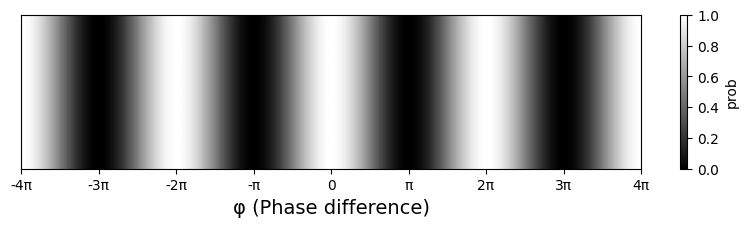

In [49]:
plt.figure(figsize=(10, 2))
probability_2d = np.array(probability).reshape(1, 1000)
plt.imshow(probability_2d, cmap='gray', aspect='auto', extent=[-4*np.pi, 4*np.pi, 0, 1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-4*np.pi, -3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi],
           labels=['-4π', '-3π', '-2π', '-π', '0', 'π', '2π', '3π', '4π'])
plt.yticks([])
plt.show()